IMPORTING THE DEPENDENCIES

In [544]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

COLLECTING DATA

In [545]:
data_df = pd.read_csv('BTC-USD.csv', date_parser = True)
data_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,18263.929688,18268.453125,17619.533203,18058.904297,18058.904297,27919640985
1,2020-12-12,18051.320313,18919.550781,18046.041016,18803.656250,18803.656250,21752580802
2,2020-12-13,18806.765625,19381.535156,18734.332031,19142.382813,19142.382813,25450468637
3,2020-12-14,19144.492188,19305.099609,19012.708984,19246.644531,19246.644531,22473997681
4,2020-12-15,19246.919922,19525.007813,19079.841797,19417.076172,19417.076172,26741982541
...,...,...,...,...,...,...,...
361,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,33676814852
362,2021-12-08,50667.648438,51171.375000,48765.988281,50504.796875,50504.796875,28479699446
363,2021-12-09,50450.082031,50797.164063,47358.351563,47672.121094,47672.121094,29603577251
364,2021-12-10,47642.144531,50015.253906,47023.699219,47243.304688,47243.304688,30966005122


REMOVING UNNECESSARY COLUMNS

In [546]:
data = data_df.drop(['Date', 'Adj Close'], axis = 1)
data.head()

,Open,High,Low,Close,Volume
0,18263.929688,18268.453125,17619.533203,18058.904297,27919640985
1,18051.320313,18919.550781,18046.041016,18803.656250,21752580802
2,18806.765625,19381.535156,18734.332031,19142.382813,25450468637
3,19144.492188,19305.099609,19012.708984,19246.644531,22473997681
4,19246.919922,19525.007813,19079.841797,19417.076172,26741982541


SCALING THE PARAMETERS USING MIN MAX SCALER with MIN - 0 and MAX - 1

In [547]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data

array([[0.00429528, 0.        , 0.        , 0.        , 0.02749008],
       [0.        , 0.01288762, 0.00874663, 0.01504309, 0.00892466],
       [0.01526201, 0.02203199, 0.02286179, 0.02188495, 0.02005685],
       ...,
       [0.65454141, 0.64386295, 0.6098703 , 0.59815105, 0.03255943],
       [0.59781358, 0.62838607, 0.6030074 , 0.58948948, 0.03666091],
       [0.59169683, 0.6046376 , 0.60133908, 0.61095685, 0.04053   ]])

In [548]:
data.shape[0]

366

Creating LSTM Training Dataset using 311 samples with time step of 50 Days (256 samples of size 50x5)


In [549]:
X_train = []
Y_train = []
for i in range(50, data.shape[0]-60):
    X_train.append(data[i-50:i])
    Y_train.append(data[i,0])

In [550]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [551]:
X_train.shape, Y_train.shape

((256, 50, 5), (256,))

Creating LSTM Test Dataset using 60 samples

In [552]:
X_test = []
Y_test = []
for i in range(data.shape[0]-60, data.shape[0]):
    X_test.append(data[i-50:i])
    Y_test.append(data[i,0])


In [553]:
X_test, Y_test = np.array(X_test), np.array(Y_test)

In [554]:
X_test.shape, Y_test.shape

((60, 50, 5), (60,))

BUILDING LSTM - Long short term memory

In [555]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

Defining Model in a sequential manner

In [556]:
regressor = Sequential()
regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))

regressor.add(LSTM(units = 100, activation = 'relu', return_sequences = True))

regressor.add(LSTM(units = 120, activation = 'relu'))

regressor.add(Dense(units = 1))

In [557]:
regressor.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_100 (LSTM)             (None, 50, 50)            11200     
                                                                 
 dropout_40 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_101 (LSTM)             (None, 50, 80)            41920     
                                                                 
 lstm_102 (LSTM)             (None, 50, 100)           72400     
                                                                 
 lstm_103 (LSTM)             (None, 120)               106080    
                                                                 
 dense_27 (Dense)            (None, 1)                 121       
                                                                 
Total params: 231,721
Trainable params: 231,721
Non-t

OPTIMIZER - ADAM OPTIMIZER

LOSS FUNCTION - mean_squared_error or mean_absolute_error

absolute error more accurate and interpretable

In [558]:
regressor.compile(optimizer = 'adam', loss = 'mean_absolute_error')

ADJUST TO GET LOWER LOSS


In [559]:
regressor.fit(X_train, Y_train, epochs = 15, batch_size =35)

Epoch 1/15
8/8 [==============================] - 8s 175ms/step - loss: 0.4324
Epoch 2/15
8/8 [==============================] - 1s 174ms/step - loss: 0.1383
Epoch 3/15
8/8 [==============================] - 1s 176ms/step - loss: 0.1135
Epoch 4/15
8/8 [==============================] - 1s 174ms/step - loss: 0.1155
Epoch 5/15
8/8 [==============================] - 2s 236ms/step - loss: 0.1066
Epoch 6/15
8/8 [==============================] - 2s 302ms/step - loss: 0.1006
Epoch 7/15
8/8 [==============================] - 1s 172ms/step - loss: 0.0957
Epoch 8/15
8/8 [==============================] - 2s 193ms/step - loss: 0.0944
Epoch 9/15
8/8 [==============================] - 1s 175ms/step - loss: 0.0949
Epoch 10/15
8/8 [==============================] - 1s 175ms/step - loss: 0.0979
Epoch 11/15
8/8 [==============================] - 1s 178ms/step - loss: 0.1004
Epoch 12/15
8/8 [==============================] - 1s 175ms/step - loss: 0.0911
Epoch 13/15
8/8 [==============================] 

VALUES SCALED DOWN DUE TO MIN MAX, REVERTING TO ACTUAL VALUE IS NESSASARY

In [560]:
scale = 1/scaler.scale_[0]

In [561]:
Y_test = Y_test*scale

PREDICTING THE PRICE

In [562]:
Y_pred = regressor.predict(X_test)

2/2 [==============================] - 1s 47ms/step


In [563]:
Y_pred = Y_pred*scale

GRAPH VISUALIZATUION - MATPLOTLIB

<ipython-input-564-8eb0c6213244>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data_df.corr()


<Axes: >

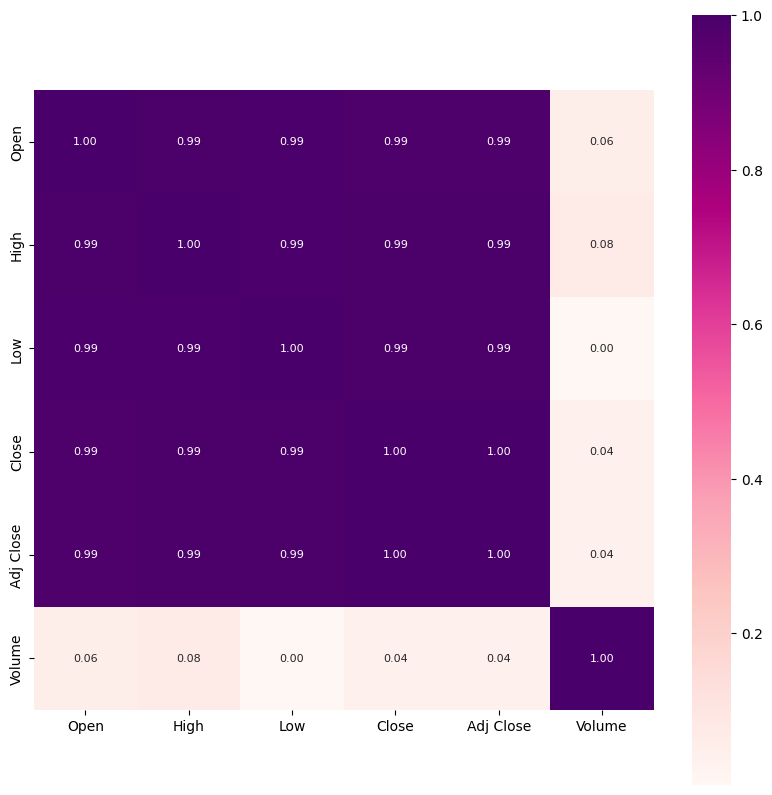

In [564]:
correlation = data_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='RdPu')

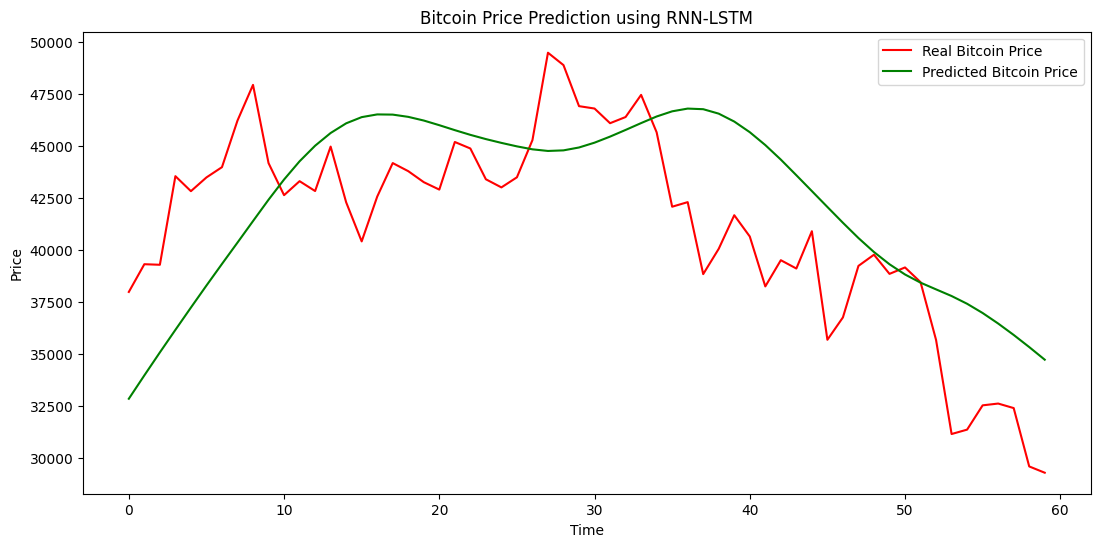

In [565]:
plt.figure(figsize=(13,6))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()